# NumPy for Python Student Notebook

A compendium of data analysis topics, illustrative examples, best practices, tips and tricks.

## Table of Contents

+ [NumPy Introduction](#Intro)
+ [Supporting Modules](#Import)
+ [Array Generation](#Generation)
+ [Array Characteristics](#ArrayCharacteristics)
+ [Appendix](#Appendix)


## NumPy Introduction
<a id=Intro></a>

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes. The number of axes is rank.

Unlike many Python objects, many NumPy array methods do not change the actual array object.

The organization of this notebook is influenced by these tutorials:

https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

http://www.tutorialspoint.com/numpy/



## Import Supporting Modules
<a id=#Import></a>
The following modules are used to support NumPy operations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print (np.__version__)


1.11.1


## Array Generation
<id = #Generation></a>
NumPy array transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

numpy.array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)

In NumPy, the creation of a new array and populating it with starting values are frequently performed together.  This section focuses on the process of creation, and array characteristics at creation.  The next section focuses on populating arrays (frequently at creation.)

### Generating Conventional (Homogenous Numeric) Arrays

In [3]:
# Can create an array from a regular Python list or tuple using the array function. 
# The type of the resulting array is deduced from the type of the elements in the sequences.
a1 = np.array([2,3,4]) # Generate array from list
print (a1)
print (a1.dtype)         # Integer default type may vary for various reasons

a1 = np.array((2,3,4))  # Generate array from tuple
print (a1)
print (a1.dtype)         # Integer default type may vary for various reasons

a1_t = ((2,3,4), (5,6,7), (7,8,9))  # Generate array from nested tuple
a1 = np.array(a1_t)  # Generate array from nested tuple
print (a1)
print (a1.dtype)         # Integer default type may vary for various reasons
print ("#" + 65*'-')

a2 = np.array([1.2, 3.5, 5.1])
print (a2)
print (a2.dtype)
print ("#" + 65*'-')

a = np.array([1, 2, 3,4,5], ndmin = 3) # Tricky!  Note empty extra dimension when printed.  (Look a parens.)
print (a)
print ("#" + 65*'-')

a3 = np.arange(15)     # That method is ARRAY RANGE, not ARRANGE
print (a3)
print (a3.dtype)
print ("#" + 65*'-')

# The type can be specified at creation
a4 = np.array( [ [1,2], [3,4] ], dtype=complex )   
print (a4)
print (a4.dtype)
print ("#" + 65*'-')

# Arrays can be created early, to be populated later.  Resizing arrays may be process intensive
# Create an array of zeros
az1 = np.zeros( (3,4) )
print (az1)
print (az1.dtype)
print ("#" + 65*'-')

# Create an array of constants
az2 = np.ones( (2,3,4), dtype=np.int16 )  # dtype can also be specified
print (az2)                               # Note how 3rd dimension is printed
print (az2.dtype)
print ("#" + 65*'-')

# Create an array of somewhat random values from pre-existing memory contents
#   Believed to likely contain very small floating point numbers.  ~EE-10
az3 = np.empty( (3,4) ) 
print (az3)
print (az3.dtype)
print ("#" + 65*'-')

# Create an array of intentionally random values
az4 = np.random.standard_normal( (3,5) ) 
print (az4)
print (az4.dtype)
print ("#" + 65*'-')

# Create an array with the same data type as another array.
adt1 = az2.dtype
print (adt1)
az5 = np.ones( (3,3,3), dtype=adt1)
print (az5)

[2 3 4]
int32
[2 3 4]
int32
[[2 3 4]
 [5 6 7]
 [7 8 9]]
int32
#-----------------------------------------------------------------
[ 1.2  3.5  5.1]
float64
#-----------------------------------------------------------------
[[[1 2 3 4 5]]]
#-----------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
int32
#-----------------------------------------------------------------
[[ 1.+0.j  2.+0.j]
 [ 3.+0.j  4.+0.j]]
complex128
#-----------------------------------------------------------------
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
float64
#-----------------------------------------------------------------
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]
int16
#-----------------------------------------------------------------
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
float64
#-----------------------------------------------------------------
[[ 0.1719336   1.54261358 -2.04939128 -1.034

### Generating Structured Arrays

In [4]:
# Start by defining your own data type
ship = np.dtype([('name', 'S20'), ('hull', 'S10'), ('gun', 'u2')])
battlewagons = np.array([('New York', 'BB-34', 10), ('Texas', 'BB-35', 10)], dtype = ship)
print (battlewagons)

[(b'New York', b'BB-34', 10) (b'Texas', b'BB-35', 10)]


## Array Characteristics
<a id=#ArrayCharacteristics></a>
Array characteristics can be accessed via a number of array object methods.

In the Python world, the number of dimensions is referred to as rank.

There are multiple default data types for arrays, depending on the type of data contained therein.  If left unspecified, the data type of an output array resulting from manipulating various input arrays will likely depend on the manipulation results, and max "exceed" the precision of the input arrays.  (This is known as __upcasting__.)

In [5]:
# From the 3D array:
az2 = np.ones( (2,3,4), dtype=np.int16 )
print (az2.dtype)     # Data Type
print (az2.ndim)      # Number of axes of dimensions
print (az2.shape)     # Dimensions of the array
print (az2.itemsize)  # Size of each element in bytes
print (az2.flags)     # Some more complex internal characteristics
print (az2.data)      # The data buffer location (very rarely used)


int16
3
(2, 3, 4)
2
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


## Populating Arrays
<a id=#PopulatingArrays></a>
In NumPy, the creation of a new array and populating it with starting values are frequently performed together.  This section focuses on populating arrays (frequently at creation.)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
float64
#-----------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
int32
#-----------------------------------------------------------------
[ 0  5 10 15 20 25 30 35]
int32
#-----------------------------------------------------------------
[ 0.   0.3  0.6  0.9  1.2  1.5  1.8  2.1  2.4  2.7]
float64
#-----------------------------------------------------------------
[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2. ]
float64
#-----------------------------------------------------------------
float64
float64
#-----------------------------------------------------------------
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.]
float64
#-----------------------------------------------------------------
[    2.     4.     8.    16.    32.    64.   128.   256.   512.  1024.]
#-----------------------------------------------------------------


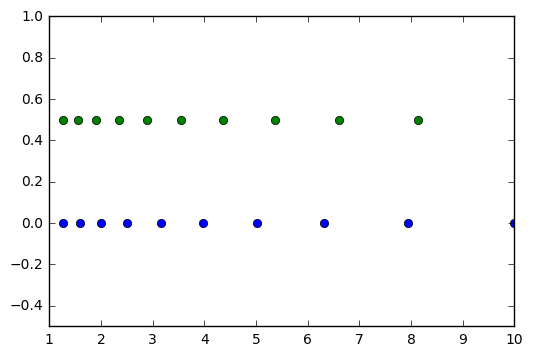

In [6]:
# Create an array of zeros
az1 = np.zeros( (3,4) )
print (az1)
print (az1.dtype)
print ("#" + 65*'-')

# Use np.arange to populate with a range of numbers.
a3 = np.arange(15)     # That method is ARRAY RANGE, not ARRANGE
print (a3)
print (a3.dtype)
print ("#" + 65*'-')

# Use np.arange to populate with a range of integers.
a4 = np.arange(0, 40, 5)     # That method is ARRAY RANGE, not ARRANGE
print (a4)
print (a4.dtype)
print ("#" + 65*'-')

# np.arange can populate with a range of floating, but not always well.
a5 = np.arange( 0, 3, 0.3 )     # That method is ARRAY RANGE, not ARRANGE
print (a5)
print (a5.dtype)
print ("#" + 65*'-')

# Use np.linspace to populate with a sequence of floating point numbers.
a6 =  np.linspace( 0, 2, 11 )     # That method is Linear Spacing Range
print (a6)
print (a6.dtype)
print ("#" + 65*'-')

from numpy import pi
a7 = np.linspace( 0, 2*pi, 100 )        # useful to evaluate function at lots of points
a8 = np.sin(a7)
print (a7.dtype)
print (a8.dtype)
print ("#" + 65*'-')

# np.fromiter can populate from a Python iterator
num_seq = range(9) 
it = iter(num_seq)  
# use iterator to create ndarray 
a9 = np.fromiter(it, dtype = float) 
print (a9)
print (a9.dtype)
print ("#" + 65*'-')


# Use np.logspace to populate with a logarithmically increasing sequence.
a10 = np.logspace(1,10,num = 10, base = 2) 
print (a10)
print ("#" + 65*'-')

N = 10
x1 = np.logspace(0.1, 1, N, endpoint=True) # That method is Logarithmic Spacing Range
x2 = np.logspace(0.1, 1, N, endpoint=False)
y = np.zeros(N)
plt.plot(x1, y, 'o')
# [<matplotlib.lines.Line2D object at 0x...>]
plt.plot(x2, y + 0.5, 'o')
# [<matplotlib.lines.Line2D object at 0x...>]
plt.ylim([-0.5, 1])
# (-0.5, 1)
plt.show()

### Array Arithmetic and Simple Math Operations
Most simple array operations are performed on and with arrays on an element-by-element basis (or element-wise.)
Simple math operations fall into a few categories:
+ Array arithmentic performed between corresponding elements of arrays of identical shape.
+ Creation of new (identical shape) target array based on element-wise operation (from scalar) on each element in source array.
+ Creation of new (identical shape) target array based on element-wise operation (from 1x1 array) on each element in source array.
+ Modification of existing array based on element-wise scalar operation on each element in source array.  ("In place")




[ 0 10 20 30 40 50]
[0 1 2 3 4 5]
#-----------------------------------------------------------------
[ 0 11 22 33 44 55]
#-----------------------------------------------------------------
[  0  10  40  90 160 250]
#-----------------------------------------------------------------
[ 0  1  4  9 16 25]
#-----------------------------------------------------------------
[  0.         -54.40211109  91.29452507 -98.80316241  74.51131605
 -26.23748537]
#-----------------------------------------------------------------
[ 0.          3.16227766  4.47213595  5.47722558  6.32455532  7.07106781]
#-----------------------------------------------------------------
[ True  True False False False False]
bool
#-----------------------------------------------------------------
[ 5 15 25 35 45 55]
#-----------------------------------------------------------------
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
[[ 3.  3.  3.  3.]
 [ 3.  3.  

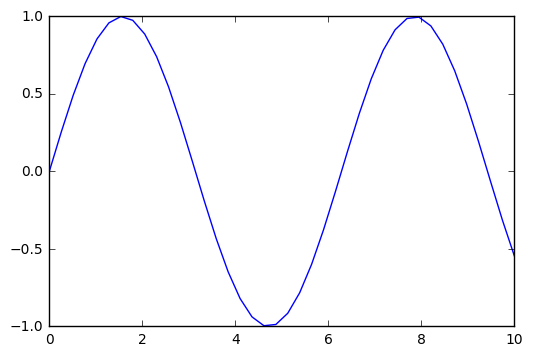

In [36]:
a = np.array( [0, 10, 20,30,40,50] )
b = np.arange( 6 )
print (a)
print (b)
print ("#" + 65*'-')

# Addition of identical shape arrays
c = a + b
print (c)
print ("#" + 65*'-')

# Multipication of identical shape arrays.  NOTE:  This is not matrix multiplication!
c = a * b
print (c)
print ("#" + 65*'-')

# Element-wise exponentiation of  arrays
c = b**2
print (c)
print ("#" + 65*'-')

# Element-wise transcendental math of arrays
c = 100*np.sin(a)
print (c)
print ("#" + 65*'-')

# Alternate element-wise transcendetnal math of arrays, called "Universal Function"
print (np.sqrt(a))
print ("#" + 65*'-')

# Element-wise testing arrays
a<15
c = (a<15)
print (c)
print (c.dtype)
print ("#" + 65*'-')

# One element vector added to true vector is the same as scalar addition to all elements in vector.
d = np.array([5])
c = a + d
print (c)
print ("#" + 65*'-')

# "In Place" operations will modify every element in the same way.  Source array is changed!
d = np.zeros( (3,4) )
print (d)
d +=1
print (d)
d *=3
print (d)
print ("#" + 65*'-')

# Simple plotting of array math using universal functions
%matplotlib inline
x = np.linspace(0,10,40)
sinx = np.sin(x)
plt.plot(x,sinx)





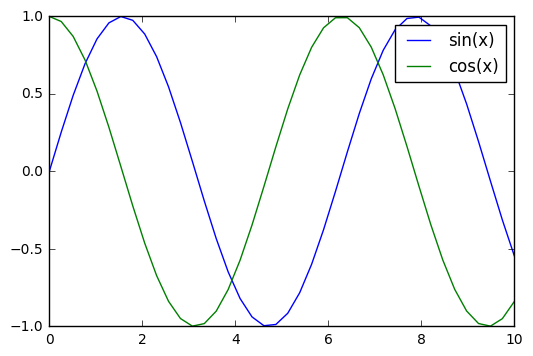

In [41]:
cosx = np.cos(x)
plt.plot(x,sinx)
plt.plot(x,cosx)
plt.legend(['sin(x)','cos(x)'])

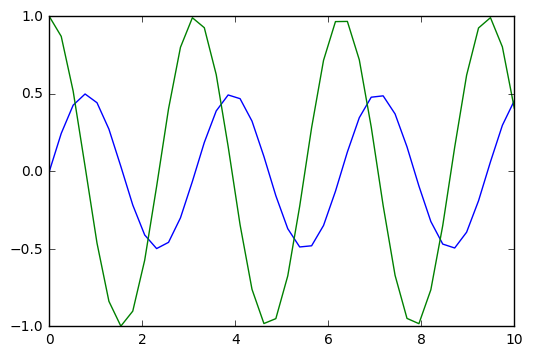

In [42]:
y = sinx * cosx
z = cosx**2 - sinx**2

plt.plot(x,y)
plt.plot(x,z)

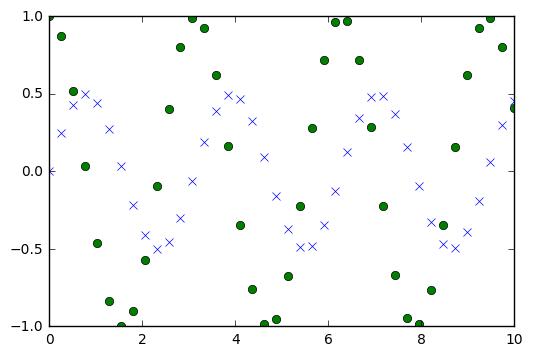

In [40]:
y = sinx * cosx
z = cosx**2 - sinx**2

plt.plot(x,y, 'x')
plt.plot(x,z, 'o')

### Array Functions, Methods, and Operations



['Houston', 'Austin', 'Huston', 'Walnut Creek', 'Kansas City', 'Atlanta']
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']
<class 'list'>
Len: 6
Min: Atlanta
My number is: 25, and my name is: Alex
My number is: 25, and my name is: Alex
My number is: 25. 'My name is: Alex.  My father's name is Alex.


### Reshaping Arrays

In [15]:
# Transpose 
m1 = np.arange(12).reshape(4,3)
print (m1)
print (m1.transpose())
print (m1)                # Note that original array is not reshaped by reshaping method!

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  3  6  9]
 [ 1  4  7 10]
 [ 2  5  8 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


### Merging Arrays

In [7]:
m1 = np.arange(12).reshape(4,3)
m2 = np.arange(12, 24, 1).reshape(4,3)

print (np.vstack([m1,m2]))
print ("#" + 65*'-')

# Horizontally Stack
print (np.hstack([m1,m2]))

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]]
#-----------------------------------------------------------------
[[ 0  1  2 12 13 14]
 [ 3  4  5 15 16 17]
 [ 6  7  8 18 19 20]
 [ 9 10 11 21 22 23]]


### Splitting Arrays

In [24]:
# Horizontal split resulting in list of arrays
m3 = np.arange(24).reshape(4,6)
print (m3)
print (type(m3))
m3a = np.hsplit(m3,3)
print (type(m3a))
print (type(m3a[0]))
print (len(m3a))
for i in range(len(m3a)): print (m3a[i])
print ("#" + 65*'-')

m3b = np.vsplit(m3,2)
for i in range(len(m3b)): print (m3b[i])
    
    

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
3
[[ 0  1]
 [ 6  7]
 [12 13]
 [18 19]]
[[ 2  3]
 [ 8  9]
 [14 15]
 [20 21]]
[[ 4  5]
 [10 11]
 [16 17]
 [22 23]]
#-----------------------------------------------------------------
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[[12 13 14 15 16 17]
 [18 19 20 21 22 23]]


### Reading, Writing, and Saving Arrays in Files



In [14]:
m1 = np.arange(12).reshape(4,3)
np.save('save_test.npy',m1)
mr1 = np.load('save_test.npy')
print (mr1)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


True!


### Printing Arrays
NumPy arrays print in a manner similar to Python nested lists.
One-dimensional arrays are then printed as rows, two-dimensionals as matrices and three-imensionals as lists of matrices.
Count the very first and last brackets to confirm rank.

If an array is too large to be printed successfully, NumPy just prints the corners:

In [5]:
a1d = np.arange(6)                         # 1d array
print(a1d)
print ("#" + 65*'-')

a2d = np.arange(12).reshape(4,3)           # 2d array
print(a2d)
print ("#" + 65*'-')

a3d = np.arange(24).reshape(2,3,4)         # 3d array
print(a3d)
print ("#" + 65*'-')

a4d = np.arange(36).reshape(2,2,3,3)         # 4d array
print(a4d)
print ("#" + 65*'-')

#  Two too big to print
print(np.arange(10000))
print ("#" + 65*'-')
print(np.arange(10000).reshape(100,100))


[0 1 2 3 4 5]
#-----------------------------------------------------------------
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
#-----------------------------------------------------------------
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
#-----------------------------------------------------------------
[[[[ 0  1  2]
   [ 3  4  5]
   [ 6  7  8]]

  [[ 9 10 11]
   [12 13 14]
   [15 16 17]]]


 [[[18 19 20]
   [21 22 23]
   [24 25 26]]

  [[27 28 29]
   [30 31 32]
   [33 34 35]]]]
#-----------------------------------------------------------------
[   0    1    2 ..., 9997 9998 9999]
#-----------------------------------------------------------------
[[   0    1    2 ...,   97   98   99]
 [ 100  101  102 ...,  197  198  199]
 [ 200  201  202 ...,  297  298  299]
 ..., 
 [9700 9701 9702 ..., 9797 9798 9799]
 [9800 9801 9802 ..., 9897 9898 9899]
 [9900 9901 9902 ..., 9997 9998 9999]]


## Pandas



## MatPlotLib


https://matplotlib.org/gallery.html

http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html

https://www.labri.fr/perso/nrougier/teaching/matplotlib/

http://mple.m-artwork.eu/tutorial

https://matplotlib.org/users/pyplot_tutorial.html

https://jakevdp.github.io/blog/2012/10/07/xkcd-style-plots-in-matplotlib/

!!!!!!!!!!

https://matplotlib.org/faq/usage_faq.html







## Appendix
<a id="Appendix"></a>

Welcome!  This notebook (and its sisters) was developed for me to practice some Python and data science fundamentals, and for me to explore and notate some interesting tricks, quirks, and lessons learned the hard way.  You may find these useful for testing your own techniques.

Because I'm a naval history buff, I have occasionally used US naval ship information as practice data.  US naval ships each have a unique identifying "hull number," making it is easy to build many common Python data structures around ship characteristics.  More information about US "hull numbers" is available from:

http://www.navweaps.com/index_tech/index_ships_list.php

### Tell Me I'm an Idiot!
I welcome coaching, constructive criticism, and insight into more efficient, effective, or Pythonic ways of accomplishing results!

Sincerely,

*Carl Gusler*

Austin, Texas

carl.gusler@gmail.com